In [ ]:
import tweepy
import pandas as pd
import numpy as np

# For plotting and visualization:
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#Credentials
from credentials import * 
def twitter_setup():
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)
    api = tweepy.API(auth)
    return api

In [ ]:
extractor = twitter_setup()

tweets = extractor.user_timeline(screen_name="realDonaldTrump", count=200)
print("Number of tweets extracted: {}.\n".format(len(tweets)))

# We print the most recent 5 tweets:
print("5 recent tweets:\n")
for tweet in tweets[:5]:
    print(tweet.text)
    print()

Number of tweets extracted: 200.

5 recent tweets:

BIG NEWS! The Political Crime of the Century is unfolding. ObamaBiden illegally spied on the Trump Campaign, both b… https://t.co/izetBFlmHZ

Every time you see a negative Big Pharma commercial against me remember, it means your drug prices are coming way down!

https://t.co/wxCTuk4GdP

https://t.co/tdqKej2tJ2

https://t.co/NX5zpbib3E



In [ ]:
df = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])
display(df.head(10))

,Tweets
0,BIG NEWS! The Political Crime of the Century i...
1,Every time you see a negative Big Pharma comme...
2,https://t.co/wxCTuk4GdP
3,https://t.co/tdqKej2tJ2
4,https://t.co/NX5zpbib3E
5,Sally Yates has zero credibility. She was a pa...
6,.@CNN has no sources on the Task Force. Their ...
7,Nevada has ZERO infrastructure for Mail-In Vot...
8,RT @realDonaldTrump: I will be interviewed on ...
9,RT @realDonaldTrump: https://t.co/JDS4zUXXJG


In [ ]:
print(tweets[0].user)

In [ ]:
df['len']  = np.array([len(tweet.text) for tweet in tweets])
df['Language']   = np.array([tweet.lang for tweet in tweets])
df['Date'] = np.array([tweet.created_at for tweet in tweets])
df['Likes']  = np.array([tweet.favorite_count for tweet in tweets])
df['ReTweets']    = np.array([tweet.retweet_count for tweet in tweets])

In [ ]:
df.tail()

,Tweets,len,Language,Date,Likes,ReTweets
195,"My friend Herman Cain, a Powerful Voice of Fre...",140,en,2020-07-30 18:42:48,148205,31504
196,"Support Patio Pizza and its wonderful owner, G...",118,en,2020-07-30 14:26:24,115349,24905
197,Drug prices will soon be lowered massively. Bi...,140,en,2020-07-30 13:44:26,141300,35376
198,"Kate Brown, Governor of Oregon, isn’t doing he...",144,en,2020-07-30 13:20:15,119711,29664
199,With Universal Mail-In Voting (not Absentee Vo...,144,en,2020-07-30 12:46:09,245599,62461


In [ ]:
from textblob import TextBlob
import re

def find_sentiment(tweet):
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [ ]:
df['Sentiment'] = np.array([ find_sentiment(tweet) for tweet in df['Tweets'] ])

In [ ]:
df.tail()

,Tweets,len,Language,Date,Likes,ReTweets,Sentiment
195,"My friend Herman Cain, a Powerful Voice of Fre...",140,en,2020-07-30 18:42:48,148205,31504,1
196,"Support Patio Pizza and its wonderful owner, G...",118,en,2020-07-30 14:26:24,115349,24905,1
197,Drug prices will soon be lowered massively. Bi...,140,en,2020-07-30 13:44:26,141300,35376,-1
198,"Kate Brown, Governor of Oregon, isn’t doing he...",144,en,2020-07-30 13:20:15,119711,29664,1
199,With Universal Mail-In Voting (not Absentee Vo...,144,en,2020-07-30 12:46:09,245599,62461,1


In [ ]:
avg = np.mean(df['len'])
allowance = avg/280*100
allowance = ("%.2f" % allowance)
print(f"The average length of the tweets is {avg} which is {allowance}% the maximum length allowed.")

The average length of the tweets is 116.01 which is 41.43% the maximum length allowed.


In [ ]:
most_liked = df[df.Likes == np.max(df['Likes'])].Tweets
most_retweeted = df[df.ReTweets == np.max(df['ReTweets'])].Tweets

In [ ]:
print(f"The most liked Tweet is:\n {most_liked}")

The most liked Tweet is:
 190    We are going to WIN the 2020 Election, BIG! #MAGA
Name: Tweets, dtype: object


In [ ]:
print(f"The most retweeted Tweet is:\n {most_retweeted}")

The most retweeted Tweet is:
 133    RT @realDonaldTrump: We are going to WIN the 2...
190    We are going to WIN the 2020 Election, BIG! #MAGA
Name: Tweets, dtype: object


In [ ]:
time_liked = pd.Series(df['Likes'].values, index=df['Date'])
time_retweet = pd.Series(df['ReTweets'].values, index=df['Date'])

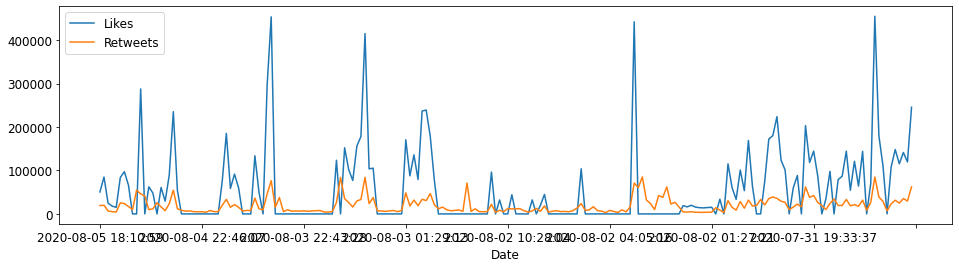

In [ ]:
time_liked.plot(figsize=(16,4), label="Likes", legend=True)
time_retweet.plot(figsize=(16,4), label="Retweets", legend=True);

In [ ]:
Total_likes = df['Likes'].sum()
Total_retweets = df['ReTweets'].sum()

In [ ]:
df.sort_values('Likes', ascending=False).head()

,Tweets,len,Language,Date,Likes,ReTweets,Sentiment
190,"We are going to WIN the 2020 Election, BIG! #MAGA",49,en,2020-07-30 20:23:17,454951,85112,1
42,OPEN THE SCHOOLS!!!,19,en,2020-08-04 03:22:56,453562,76480,0
131,MAKE AMERICA GREAT AGAIN!,25,en,2020-08-02 01:56:10,442136,71132,1
65,FAKE NEWS IS THE ENEMY OF THE PEOPLE!,37,en,2020-08-03 11:49:09,415182,84242,-1
41,People are not happy that players are not stan...,75,en,2020-08-04 12:20:09,295663,46046,-1


The total number of likes are  11002410
The total number of retweets are  3943175




<BarContainer object of 1 artists>

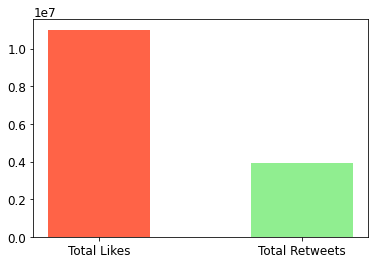

In [ ]:
ax = plt.subplot()
print('The total number of likes are ', Total_likes)
print('The total number of retweets are ', Total_retweets)
print('\n')
ax.bar('Total Likes', Total_likes, width=0.5, color='tomato', align='center')
ax.bar('Total Retweets', Total_retweets, width=0.5, color='lightgreen', align='center')

In [ ]:
#Sentiment Analysis
pos_tweets = [ tweet for index, tweet in enumerate(df['Tweets']) if df['Sentiment'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(df['Tweets']) if df['Sentiment'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(df['Tweets']) if df['Sentiment'][index] < 0]

#Percentages
pos_tweets_perc = len(pos_tweets)/200*100
neu_tweets_perc = len(neu_tweets)/200*100
neg_tweets_perc = len(neg_tweets)/200*100

<BarContainer object of 1 artists>

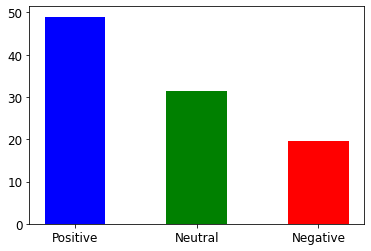

In [ ]:
ax1 = plt.subplot()
ax1.bar('Positive', pos_tweets_perc, width=0.5, color='b', align='center')
ax1.bar('Neutral', neu_tweets_perc, width=0.5, color='g', align='center')
ax1.bar('Negative', neg_tweets_perc, width=0.5, color='r', align='center')

In [ ]:
!pip install wordcloud

In [ ]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [ ]:
df['Tweets Cleaned'] = df.Tweets.str.replace(r'http\S+', '').str.replace(r'@\S+', '').str.replace('&amp', '').str.rstrip()
Eng_Tweets = df[df['Language'] == 'en']
Eng_Tweets

,Tweets,len,Language,Date,Likes,ReTweets,Sentiment,Tweets Cleaned
0,BIG NEWS! The Political Crime of the Century i...,140,en,2020-08-05 18:10:59,50499,19258,-1,BIG NEWS! The Political Crime of the Century i...
1,Every time you see a negative Big Pharma comme...,119,en,2020-08-05 18:09:59,84897,19874,-1,Every time you see a negative Big Pharma comme...
5,Sally Yates has zero credibility. She was a pa...,140,en,2020-08-05 14:15:54,83765,25380,1,Sally Yates has zero credibility. She was a pa...
6,.@CNN has no sources on the Task Force. Their ...,113,en,2020-08-05 14:05:50,97178,23788,-1,. has no sources on the Task Force. Their “sou...
7,Nevada has ZERO infrastructure for Mail-In Vot...,140,en,2020-08-05 11:08:39,66196,17112,-1,Nevada has ZERO infrastructure for Mail-In Vot...
...,...,...,...,...,...,...,...,...
195,"My friend Herman Cain, a Powerful Voice of Fre...",140,en,2020-07-30 18:42:48,148205,31504,1,"My friend Herman Cain, a Powerful Voice of Fre..."
196,"Support Patio Pizza and its wonderful owner, G...",118,en,2020-07-30 14:26:24,115349,24905,1,"Support Patio Pizza and its wonderful owner, G..."
197,Drug prices will soon be lowered massively. Bi...,140,en,2020-07-30 13:44:26,141300,35376,-1,Drug prices will soon be lowered massively. Bi...
198,"Kate Brown, Governor of Oregon, isn’t doing he...",144,en,2020-07-30 13:20:15,119711,29664,1,"Kate Brown, Governor of Oregon, isn’t doing he..."


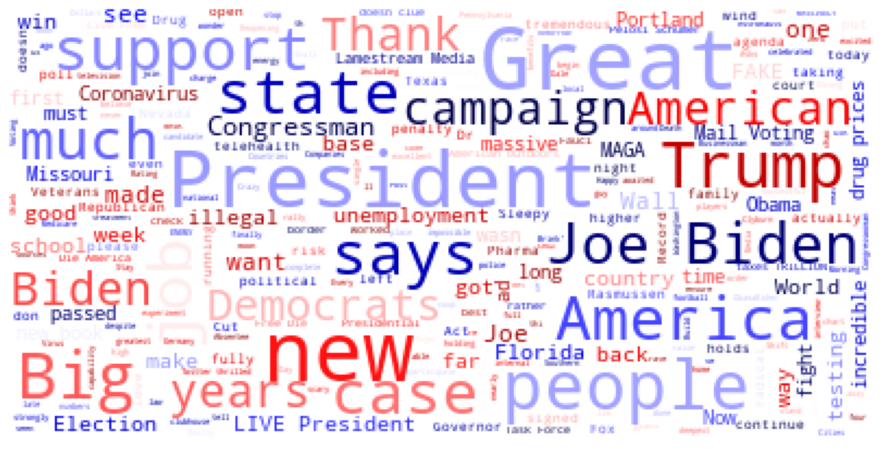

In [ ]:
stopwords = set(STOPWORDS)
stopwords.add("will")
stopwords.update(["say","said", "let", "RT", "go", "going", "many", "Dear", "hello", "watch"])
wordcloud_hc = WordCloud(max_font_size=40, relative_scaling=.5,stopwords=stopwords,colormap="seismic", background_color="White", max_words=500).generate(df['Tweets Cleaned'].str.cat())
plt.figure(figsize=[16,8])
plt.imshow(wordcloud_hc)
plt.axis("off")
plt.show()

# **COVID**

In [ ]:
Eng_Tweets = df[df['Language'] == 'en']
len(Eng_Tweets)

184

In [ ]:
covid = Eng_Tweets[Eng_Tweets['Tweets'].str.contains('COVID')]
covid_19 = Eng_Tweets[Eng_Tweets['Tweets'].str.contains('COVID-19')]
covid19 = Eng_Tweets[Eng_Tweets['Tweets'].str.contains('COVID19')]
pandemic = Eng_Tweets[Eng_Tweets['Tweets'].str.contains('pandemic')]
coronavirus = Eng_Tweets[Eng_Tweets['Tweets'].str.contains('coronavirus')]
lockdown = Eng_Tweets[Eng_Tweets['Tweets'].str.contains('lockdown')]
covid_df = pd.concat([covid, covid_19, covid19, pandemic,coronavirus, lockdown])

In [ ]:
print('Total number of entries related to covid are', len(covid_df))


Total number of entries related to covid are 2


In [ ]:
duplicate = covid_df[covid_df.duplicated(['Tweets'])]
print('Number of duplicates are', len(duplicate))

Number of duplicates are 1


In [ ]:
covid_df.drop_duplicates(subset ="Tweets", inplace = True) 

In [ ]:
duplicate = covid_df[covid_df.duplicated(['Tweets'])]
print('Number of duplicates are', len(duplicate))

Number of duplicates are 0


In [ ]:
print('Total number of entries for the given words, after removing duplicates, are', len(covid_df))

Total number of entries for the given words, after removing duplicates, are 1


In [ ]:
covid_df.reset_index(drop=True, inplace=True)

In [ ]:
#Sentiment Analysis
pos_tweets_covid = [ tweet for index, tweet in enumerate(covid_df['Tweets']) if covid_df['Sentiment'][index] > 0]
neu_tweets_covid = [ tweet for index, tweet in enumerate(covid_df['Tweets']) if covid_df['Sentiment'][index] == 0]
neg_tweets_covid = [ tweet for index, tweet in enumerate(covid_df['Tweets']) if covid_df['Sentiment'][index] < 0]

#Percentages
pos_tweets_perc = len(pos_tweets_covid)/1*100
neu_tweets_perc = len(neu_tweets_covid)/1*100
neg_tweets_perc = len(neg_tweets_covid)/1*100

<BarContainer object of 1 artists>

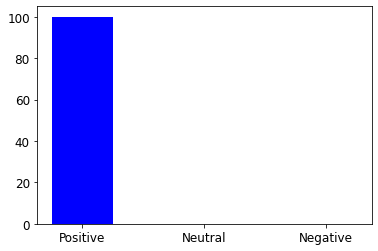

In [ ]:
ax1 = plt.subplot()
ax1.bar('Positive', pos_tweets_perc, width=0.5, color='b', align='center')
ax1.bar('Neutral', neu_tweets_perc, width=0.5, color='g', align='center')
ax1.bar('Negative', neg_tweets_perc, width=0.5, color='r', align='center')